Decision Tree Calssification: estimar la posicion de un jugador

¿como funciona el algoritmo de Decision Tree Clasifier?

Video: https://www.youtube.com/watch?v=ZVR2Way4nwQ

# Explorar datos

In [1]:
import pandas as pd

soccer_frame = pd.read_csv('../datasets/soccer.csv')

print(soccer_frame.shape)
print(soccer_frame.info())
print(soccer_frame.isna().sum())



(8847, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8847 non-null   int64  
 1   name         8847 non-null   object 
 2   rating       8847 non-null   int64  
 3   position     8847 non-null   object 
 4   height       8847 non-null   int64  
 5   foot         8847 non-null   object 
 6   rare         8847 non-null   int64  
 7   pace         7917 non-null   float64
 8   shooting     7917 non-null   float64
 9   passing      7917 non-null   float64
 10  dribbling    7917 non-null   float64
 11  defending    7917 non-null   float64
 12  heading      7917 non-null   float64
 13  diving       930 non-null    float64
 14  handling     930 non-null    float64
 15  kicking      930 non-null    float64
 16  reflexes     930 non-null    float64
 17  speed        930 non-null    float64
 18  positioning  930 non-null    float64


# Limpieza de datos

vemos que las columnas desde `diving` hasta `positioning` tienen muchos valores nulos, aunque seria interesante ver como afectan estos features en la prediccion de otra variable objetivo o en la categorizacion de un jugador, no hay datos suficientes para hacerlo

por tanto nos quedamos con el resto de variables y quitamos las 930 filas que tienen valores nulo en las columnas restantes

In [2]:
soccer_frame = soccer_frame.loc[:,'id':'heading']
soccer_frame = soccer_frame.dropna(axis=0)
print(soccer_frame.shape)
print(soccer_frame.isna().sum())

(7917, 13)
id           0
name         0
rating       0
position     0
height       0
foot         0
rare         0
pace         0
shooting     0
passing      0
dribbling    0
defending    0
heading      0
dtype: int64


### Transformar los datos

Nos interesa predecir la posicion de un jugador basado en sus features, los usados en el modelo anterior, incluido el raiting

la clase de sklearn que hace calsificacion por arboles de decision no soporta variables categoricas, en cambio, previamente hay que crear una nueva columna en la que cada observacion tenga un valor numerico en la categoria a entrenar para predecir

In [3]:
different_positions = list(soccer_frame['position'].unique())
print(different_positions)
print([different_positions.index(i) for i in different_positions])

['M', 'A', 'D']
[0, 1, 2]


In [4]:
import numpy as np

all_positions = list(soccer_frame['position'])


position_values = [different_positions.index(i) for i in all_positions]

#agregar una columna al dataframe
soccer_frame['position_values'] = position_values

soccer_frame['position_values'] = soccer_frame['position_values'].astype(int)

soccer_frame.head()


,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,position_values
1,100143,Frederik Boi,65,M,184,Right,0,61.0,0.65,63.0,59.0,62.0,62.0,0
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65.0,0.54,43.0,53.0,55.0,74.0,1
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68.0,0.38,51.0,46.0,64.0,71.0,2
4,100326,Kamel Chafni,72,M,181,Right,0,75.0,0.64,67.0,72.0,57.0,66.0,0
5,100329,Abdoulaye Faye,72,D,187,Right,1,50.0,0.37,47.0,43.0,76.0,82.0,2


# Ingenieria de variables

como solo podemos trabajar con datos numericos, descartamos variables categoricas o aquellas que no aporten al aprendizaje del modelo

In [5]:
features = ['rating', 'height', 'rare', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'heading']

## definir prediction target set y conjunto de observaciones segun features

In [6]:
y = soccer_frame['position_values']
X = soccer_frame[features]

## Definir modelo, sus parametros y variables de reproductibilidad

In [7]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split

#definir variables de reproductibilidad
random_state_model = 1
random_state_shuffle = 1
validation_size = 0.05


#split training and calidation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state= random_state_shuffle, test_size=validation_size)

#definit modelo
position_predictor_model = DTC(random_state=random_state_model)

#entrenar modelo
position_predictor_model.fit(train_X, train_y)

predicted_positions = position_predictor_model.predict(val_X)

#si no se hace copy se modifica la referencia en memoria originalde val_X y val_Y
results = val_X.copy()
results['real position'] = val_y.copy()
results['predicted position'] = predicted_positions

print(results[['predicted position', 'real position']])

      predicted position  real position
998                    0              0
4323                   1              1
2118                   0              0
6305                   1              1
7588                   1              1
...                  ...            ...
5376                   0              0
7225                   1              1
2536                   0              0
7777                   0              1
3655                   1              1

[396 rows x 2 columns]


## validate the model

In [8]:
print('Mean accuracy of the model:')
position_predictor_model.score(val_X, val_y)

Mean accuracy of the model:


0.7550505050505051

/home/forero_data/anaconda3/envs/venv_notebooks/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


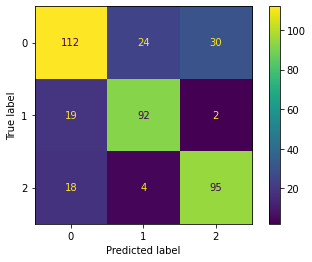

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(position_predictor_model, val_X, val_y, )


